# Lectura de los datos

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/UCordoba/Machine_Learning/EDX/Libreta_1/data/digit/train.csv').head(1000)

In [20]:
print("El conjunto de datos tiene {} filas y {} columnas".format(df.shape[0],df.shape[1]))
df.head()

El conjunto de datos tiene 1000 filas y 785 columnas


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Graficando el __primer__ número:
<img src="./img/numero.png"/>

In [21]:
y = df.label.values
x = df.drop("label",axis=1)

In [22]:
print("El conjunto de datos tiene {} filas y {} columnas".format(x.shape[0],x.shape[1]))
x.head(2)

El conjunto de datos tiene 1000 filas y 784 columnas


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El numero escrito es 4


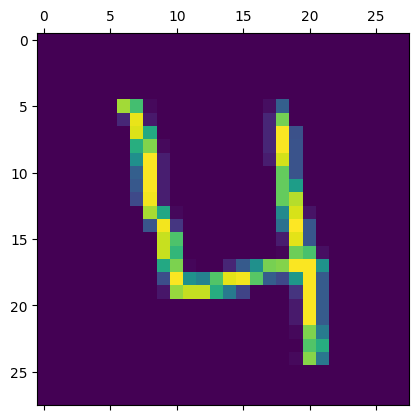

In [23]:
i = 3
plt.matshow(x.iloc[i].values.reshape(28,28))
print("El numero escrito es {}".format(y[i]))

# La red neuronal

## Preparando los datos de entrada y salida

Cuando hablamos de números, solemos verlos como ordinales
$$\overrightarrow{0, 1, 2, 3, 4, 5, 6, 7, 8, 9 }$$



$$0  \rightarrow \left  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0 \right ]$$
$$3  \rightarrow \left  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0 \right ]$$
$$4  \rightarrow \left  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0 \right ]$$
$$9  \rightarrow \left  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1 \right ]$$

In [24]:
def one_hot(j):
    e = np.zeros(10)
    e[j] = 1.0
    return e

#aplicamos la función one_hot
y_n = np.array([one_hot(number) for number in y])

y_n

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#Solo para comparar el vector nuevo contra el numero original
for a,b in zip(y_n[:5],y[:5]): print(b," se convierte en ",a)

1  se convierte en  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0  se convierte en  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1  se convierte en  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4  se convierte en  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0  se convierte en  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Es muy importante normalizar los datos de entrada

In [26]:
#Normalizamos x
x = x/255

# Construyendo la red neuronal

In [27]:
lr = 0.01 #Learning rate para controlar la velocidad de aprendizaje
#randn(genera numeros aleatorios normalizados)
w0 = np.random.randn(x.shape[1],16) # pesos para el tamaño de los pixeles y numero de columnas
w1 = np.random.randn(16, 16)
w2 = np.random.randn(16, 10) # Pesos para el numero de columnas y 10 para el número de salidas
b0 = np.random.randn(1, 16) # inicialización de los bias o sesgos 
b1 = np.random.randn(1, 16)
b2 = np.random.randn(1, 10)
Z0,z1,z2,a0,a1,a2,a3 = [],[],[],[],[],[],[] # para los feedforward
y = y
mse=0 # error cuadrático
output = np.zeros(y.shape)
errors = [] # Acumulación de errores en tiempo de entrenamiento

In [28]:
w0.shape

(784, 16)

In [29]:
b0.shape

(1, 16)

In [30]:
w1.shape

(16, 16)

In [31]:
b1.shape

(1, 16)

In [32]:
w2.shape

(16, 10)

In [33]:
b2.shape

(1, 10)

In [34]:
# Funcion de activación para disparar o no la red neuronal
def sigmoid(t):
    return 1/(1+np.exp(-t))

def sigmoid_derivative(p):
    return sigmoid(p) * sigmoid(1 - p)

In [35]:
def feedforward(x_input):
    #np.dot regresa el producto punto de dos arreglos.
    global a0,z0,a1,z1,a2,z2,a3
    a0 = x_input
    z0 = np.dot(a0,w0) + b0 # Acumulación de la capa 0
    a1 = sigmoid(z0) # Activación de la neurona
    z1 = np.dot(a1,w1) + b1
    a2 = sigmoid(z1) #Matriz de acumlación
    z2 = np.dot(a2,w2) + b2
    a3 = sigmoid(z2) # Capa de salida
    output = a3
    return output

In [36]:
def backprop():
    # Aplicando la regla de la cadena para la función de perdida respecto a los pesos 2 y 1.
    # .T devuelve la matriz traspuesta
    global mse,w0,w1,w2,b0,b1,b2
    mse = np.sum((y_n - output)**2) # Almacena el error en un vector se contrastan el valor real con la salida
    errors.append(mse) # Se almacena en una lista para analizarlos posteriormente

    delta2 = -(y_n - output) * sigmoid_derivative(z2) #Diferencia de la salida con la prediccion
    d_w2 = np.dot(a2.T,delta2) # Se activa la capa dos con la matriz transpuesta para que coincidan los lados de las matrices
    
    d_b2 = delta2 #El cambio que lleva el sesgo en la tercera capa 
    
    delta1 = np.dot(delta2,w2.T) * sigmoid_derivative(z1)
    d_w1 = np.dot(a1.T,delta1)
    d_b1 = delta1
    
    delta0 = np.dot(delta1,w1.T) * sigmoid_derivative(z0)
    d_w0 = np.dot(a0.T,delta0)
    d_b0 = delta0
    
#Actualización de los pesos
    w2 = w2 - lr * d_w2 # Se le resta el learning rate x la gradiente
    w1 = w1 - lr * d_w1
    w0 = w0 - lr * d_w0

    b2 = b2 - lr * d_b2.mean(axis=0).reshape(b2.shape)
    b1 = b1 - lr * d_b1.mean(axis=0).reshape(b1.shape)
    b0 = b0 - lr * d_b0.mean(axis=0).reshape(b0.shape)

In [37]:
#Ciclo para hacer la predicción
for i in range(10000):
    output = feedforward(x) #Toma los datos originales
    backprop()
    if i % 100 == 0: # Cada 100 interaciones imprime el mensaje
        print("Epoch: {}, mse: {}".format(i,mse))

Epoch: 0, mse: 3877.981838260736
Epoch: 100, mse: 699.8601754066611
Epoch: 200, mse: 479.36793627118107
Epoch: 300, mse: 308.62334210834365
Epoch: 400, mse: 215.10869209116083
Epoch: 500, mse: 181.24231553560352
Epoch: 600, mse: 166.5102791235372
Epoch: 700, mse: 92.61150511561291
Epoch: 800, mse: 54.089903071725054
Epoch: 900, mse: 46.76514573918036
Epoch: 1000, mse: 41.56232550017632
Epoch: 1100, mse: 38.31958960353476
Epoch: 1200, mse: 36.166971465029754
Epoch: 1300, mse: 33.62934840814121
Epoch: 1400, mse: 31.968840676909206
Epoch: 1500, mse: 30.85552412965158
Epoch: 1600, mse: 29.19893793473879
Epoch: 1700, mse: 27.804151097121473
Epoch: 1800, mse: 26.858874992513417
Epoch: 1900, mse: 26.450075321639204
Epoch: 2000, mse: 24.912360158408305
Epoch: 2100, mse: 24.41449313987043
Epoch: 2200, mse: 23.773536381017372
Epoch: 2300, mse: 23.230192790253675
Epoch: 2400, mse: 21.453108983466773
Epoch: 2500, mse: 21.107925555635852
Epoch: 2600, mse: 20.822637335752923
Epoch: 2700, mse: 20.576

In [38]:
output[0]

array([1.41203727e-04, 9.98837993e-01, 2.87671791e-04, 3.50451508e-06,
       1.27255825e-04, 2.58953966e-05, 9.50071363e-03, 7.28513536e-08,
       1.71145749e-03, 1.71474327e-06])

In [44]:
#Nos va a mostrar en que elemento se encuentra el valor más alto
y_hat = output.argmax(axis=1) 
y_hat[:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [45]:
#Imprimir los primero datos originales
y[:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [46]:
#Nos visualice donde se equivoco
y != y_hat

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [48]:
#Nos muestra el numero de caso en que se equivoco
(y != y_hat).sum()

12

De los 10,000 valores solamente existen 619 que no pudo predecir correctamente.

In [49]:
#Nos visualiza en una matriz los errores
errores = x[y != y_hat].index
x[y != y_hat]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El numero escrito es 5
El numero predicho es 1


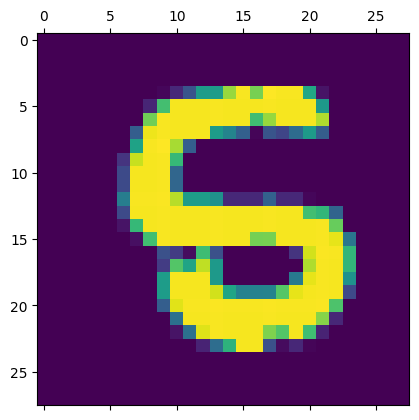

El numero escrito es 2
El numero predicho es 4


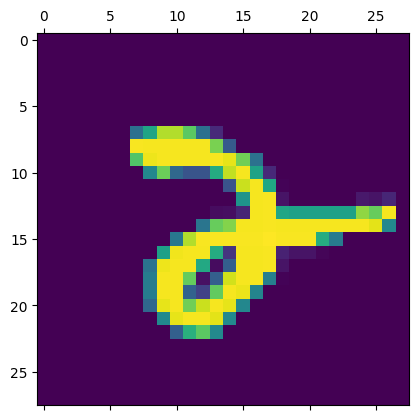

El numero escrito es 1
El numero predicho es 5


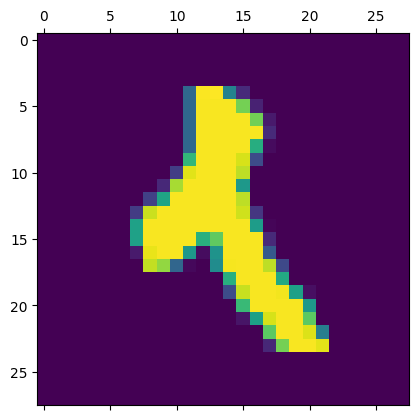

El numero escrito es 3
El numero predicho es 2


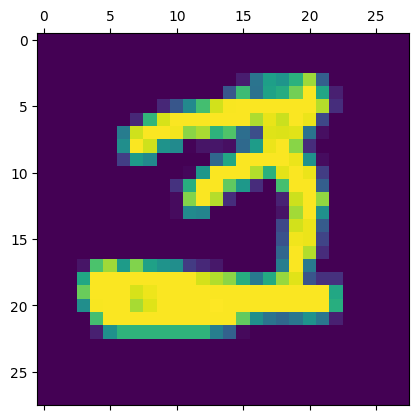

El numero escrito es 6
El numero predicho es 4


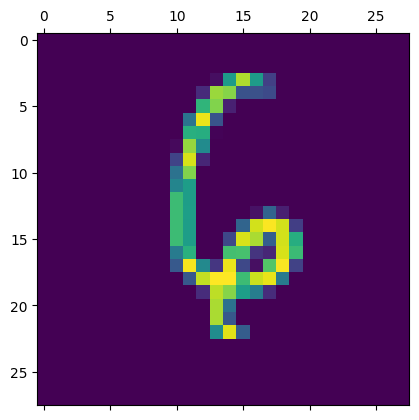

El numero escrito es 9
El numero predicho es 2


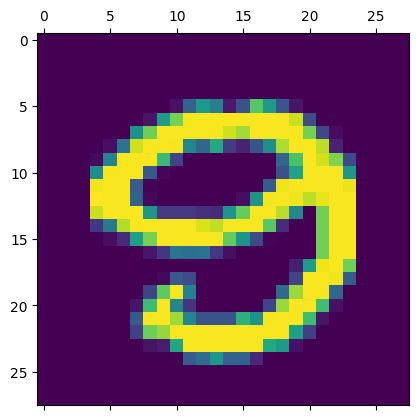

El numero escrito es 4
El numero predicho es 9


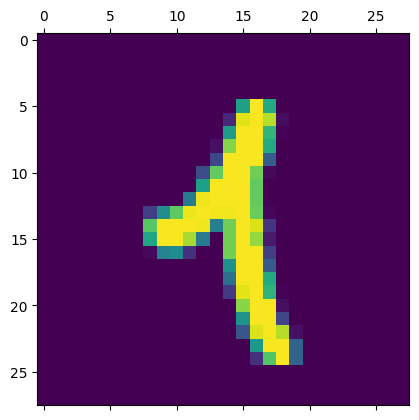

El numero escrito es 7
El numero predicho es 4


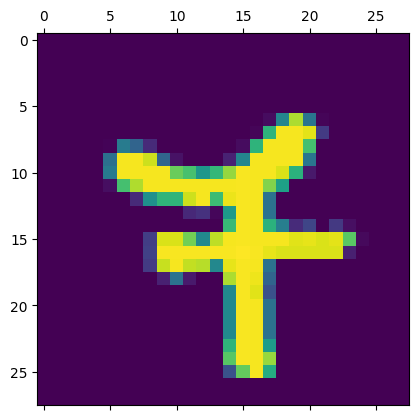

El numero escrito es 7
El numero predicho es 1


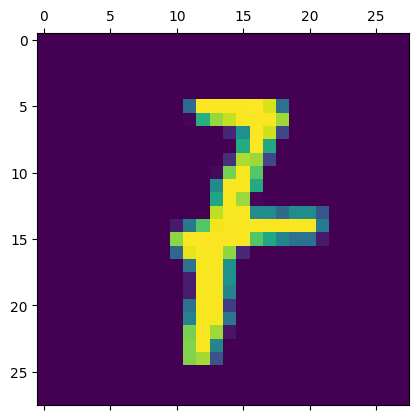

El numero escrito es 1
El numero predicho es 2


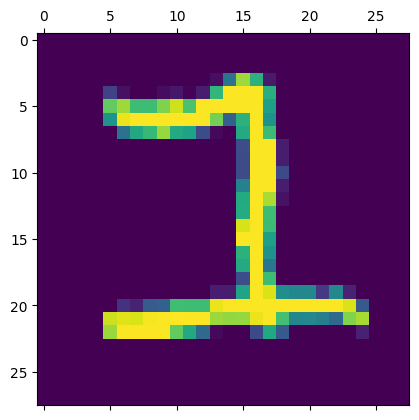

El numero escrito es 2
El numero predicho es 8


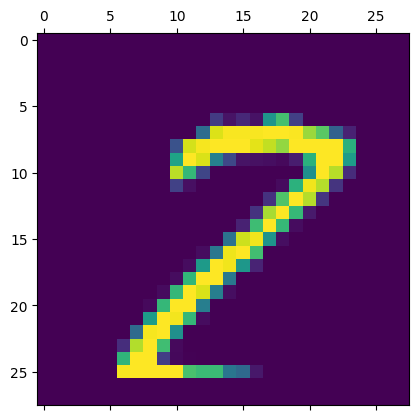

El numero escrito es 7
El numero predicho es 9


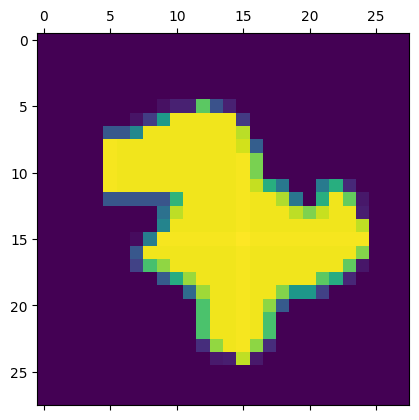

In [50]:
#Se visualiza en que imagenes se equivoco
for i in errores:
    plt.matshow(x.iloc[i].values.reshape(28,28))
    print("El numero escrito es {}".format(y[i]))
    print("El numero predicho es {}".format(y_hat[i]))
    plt.show()